<a href="https://colab.research.google.com/github/yishingene/autoencoder_anomaly/blob/main/autoencoder_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/otenim/AnomalyDetectionUsingAutoencoder

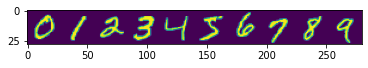

In [19]:
from keras.datasets import fashion_mnist, mnist
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline 

# create an image for Mnist
(x_train, y_train), (_,_) = mnist.load_data()
num_classes = 10
imgs = []
for i in range(num_classes):
    ind = (y_train == i)
    imgs.append(x_train[ind][0])
img = np.concatenate(imgs, axis=-1)
img = Image.fromarray(img)
 
imshow(img)

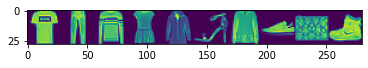

In [20]:
# create an image for FashionMnist
(x_train, y_train), (_,_) = fashion_mnist.load_data()
num_classes = 10
imgs = []
for i in range(num_classes):
    ind = (y_train == i)
    imgs.append(x_train[ind][0])
img = np.concatenate(imgs, axis=-1)
img = Image.fromarray(img)

imshow(img)
# img.save('pictures/fashion_mnist.png')

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

def autoencoder():
    input_shape=(784,)
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(784, activation='sigmoid'))
    return model

def deep_autoencoder():
    input_shape=(784,)
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    return model

def convolutional_autoencoder():

    input_shape=(28,28,1)
    n_channels = input_shape[-1]
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPool2D(padding='same'))
    model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(padding='same'))
    model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(UpSampling2D())
    model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(UpSampling2D())
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(n_channels, (3,3), activation='sigmoid', padding='same'))
    return model

def load_model(name):
    if name=='autoencoder':
        return autoencoder()
    elif name=='deep_autoencoder':
        return deep_autoencoder()
    elif name=='convolutional_autoencoder':
        return convolutional_autoencoder()
    else:
        raise ValueError('Unknown model name %s was given' % name)

# 新增區段

In [11]:
from keras.datasets import mnist, fashion_mnist
# from models import load_model
import numpy as np
import os
import argparse
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import math

# curdir = os.path.dirname(os.path.abspath(__file__))
# parser = argparse.ArgumentParser()
# parser.add_argument('--optimizer', choices=['adam','sgd','adagrad'], default='adam')
# parser.add_argument('--loss', choices=['mean_squared_error', 'binary_crossentropy'], default='mean_squared_error')
# parser.add_argument('--epochs', type=int, default=10)
# parser.add_argument('--batch_size', type=int, default=64)
# parser.add_argument('--test_samples', type=int, default=50)
# parser.add_argument('--result', default=os.path.join(curdir, 'result.png'))

In [12]:
# prepare normal dataset (Mnist)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255. # normalize into [0,1]
x_test = x_test / 255.

# prapare abnormal dataset (Fashion Mnist)
(_, _), (x_abnormal, _) = fashion_mnist.load_data()
x_abnormal = x_abnormal / 255.

# sample args.test_samples images from eaech of x_test and x_abnormal
perm = np.random.permutation(50)
x_test = x_test[perm][:50]
x_abnormal = x_abnormal[perm][:50]

In [13]:
# # train each model and test their capabilities of anomaly deteciton
# model_names = ['autoencoder', 'deep_autoencoder', 'convolutional_autoencoder']
# for model_name in model_names:
#     # instantiate model
#     model = load_model(model_name)

#     # reshape input data according to the model's input tensor
#     if model_name == 'convolutional_autoencoder':
#         x_train = x_train.reshape(-1,28,28,1)
#         x_test = x_test.reshape(-1,28,28,1)
#         x_abnormal = x_abnormal.reshape(-1,28,28,1)
#     elif model_name == 'autoencoder' or model_name == 'deep_autoencoder':
#         x_train = x_train.reshape(-1,28*28)
#         x_test = x_test.reshape(-1,28*28)
#         x_abnormal = x_abnormal.reshape(-1,28*28)
#     else:
#         raise ValueError('Unknown model_name %s was given' % model_name)

#     # compile model
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # train on only normal training data
#     model.fit(
#         x=x_train,
#         y=x_train,
#         epochs=10,
#         batch_size=64,
#     )

In [14]:
# train each model and test their capabilities of anomaly deteciton
model_names = ['autoencoder', 'deep_autoencoder', 'convolutional_autoencoder']
for model_name in model_names:
    # instantiate model
    model = load_model(model_name)

    # reshape input data according to the model's input tensor
    if model_name == 'convolutional_autoencoder':
        x_train = x_train.reshape(-1,28,28,1)
        x_test = x_test.reshape(-1,28,28,1)
        x_abnormal = x_abnormal.reshape(-1,28,28,1)
    elif model_name == 'autoencoder' or model_name == 'deep_autoencoder':
        x_train = x_train.reshape(-1,28*28)
        x_test = x_test.reshape(-1,28*28)
        x_abnormal = x_abnormal.reshape(-1,28*28)
    else:
        raise ValueError('Unknown model_name %s was given' % model_name)

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # train on only normal training data
    model.fit(
        x=x_train,
        y=x_train,
        epochs=10,
        batch_size=64,
    )

    # test
    x_concat = np.concatenate([x_test, x_abnormal], axis=0)
    losses = []
    for x in x_concat:
        # compule loss for each test sample
        x = np.expand_dims(x, axis=0)
        loss = model.test_on_batch(x, x)
        losses.append(loss)

    # plot
    plt.plot(range(len(losses)), losses, linestyle='-', linewidth=1, label=model_name)

    # delete model for saving memory
    del model

# create graph
plt.legend(loc='best')
plt.grid()
plt.xlabel('sample index')
plt.ylabel('loss')
plt.savefig("result.png")
plt.clf()


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0569
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0128
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0054
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0539
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0132
Epoch 3/10
938/938 [=======

<Figure size 432x288 with 0 Axes>

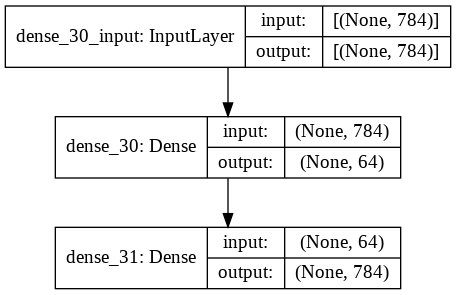

In [26]:
# model_names = ['autoencoder', 'deep_autoencoder', 'convolutional_autoencoder']
import tensorflow as tf
model = load_model('autoencoder')
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

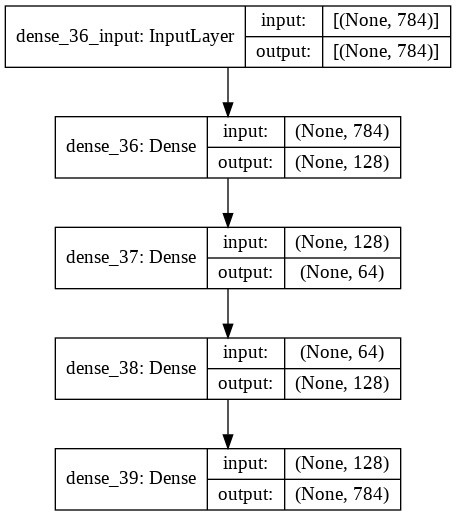

In [30]:
model = load_model('deep_autoencoder')
dot_img_file = 'model_2.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


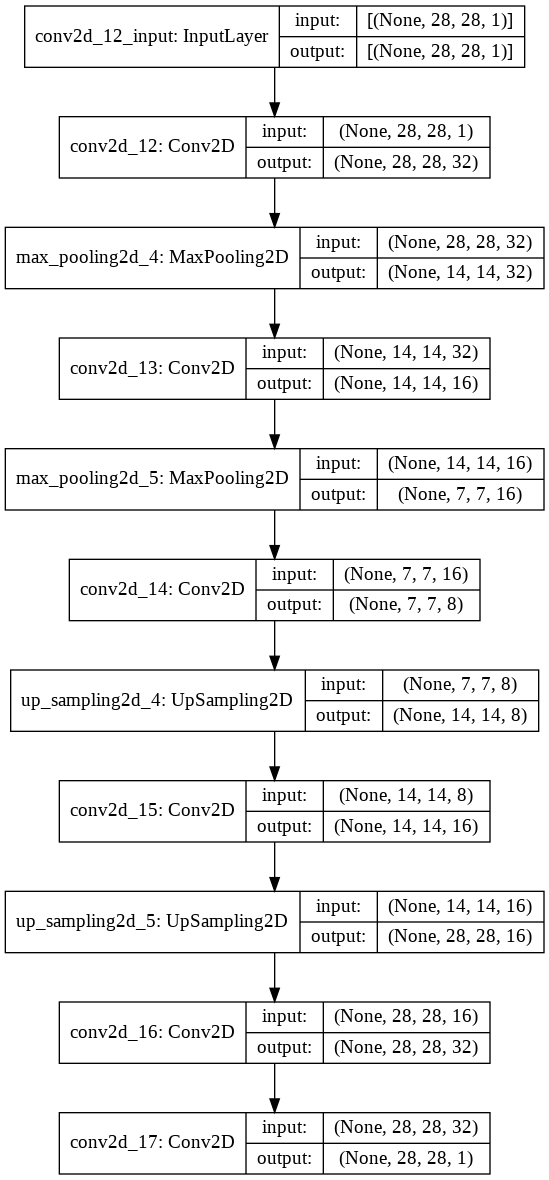

In [29]:
model = load_model('convolutional_autoencoder')
dot_img_file = 'model_3.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
